#### PER-2020 - SIN-392 - Introdução ao Processamento Digital de Imagens 

# Aula 06b - Morfologia Matemática
## Prof. João Fernando Mari
-----

## Importando as bibliotecas necessárias

In [1]:
%matplotlib notebook
import numpy as np

from scipy import ndimage

from skimage import img_as_float, filters, morphology, data
import matplotlib.pyplot as plt

## Construindo uma imagem binária simples

In [2]:
img_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

img_1 = img_1.astype(bool)

In [3]:
img_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 0, 1, 1, 0, 0],
                  [0, 0, 0, 1, 1, 0, 0, 0],
                  [0, 0, 0, 1, 1, 0, 0, 0],
                  [0, 1, 0, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]])

img_2 = img_2.astype(bool)

In [4]:
img_3 = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 0, 0, 1, 0, 0],
                  [0, 1, 0, 1, 0, 1, 1, 0],
                  [0, 0, 0, 1, 0, 1, 0, 0],
                  [0, 1, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]], dtype=bool)

img_3 = img_3.astype(bool)

In [5]:
# ***** SELECIONE A IMAGEM *****
img = img_3

<IPython.core.display.Javascript object>


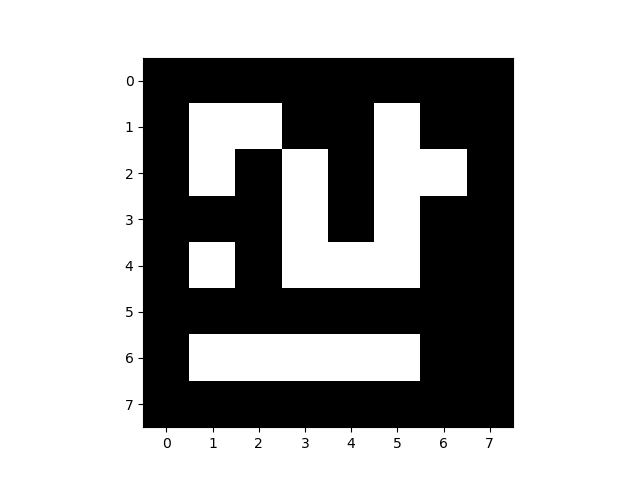

In [6]:
### Plota a imagem
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

## Transformada Hit or Miss
----
- Definir dois elementos estruturantes, um para o hit e outro para o miss. \
No hit os 1's determinam onde ocorre um acerto (hit). \
No miss, os 1's determinam onde ocorre um erro (miss). \
Coordenadas com 0's tanto no ee hit quando no ee miss são considaradas "don't care", ou seja, não importa se houve acerto ou erro.

In [7]:
# Elementos estruturantes para detectar objetos quadrados com tamanho 3x3,
#    que NÃO fazem parte de nenhum componente conectado maior. 
ee_hit_1 = np.array([[0, 0, 0, 0, 0],
                     [0, 1, 1, 1, 0],
                     [0, 1, 1, 1, 0],
                     [0, 1, 1, 1, 0],
                     [0, 0, 0, 0, 0]])

ee_miss_1 = np.array([[1, 1, 1, 1, 1],
                      [1, 0, 0, 0, 1],
                      [1, 0, 0, 0, 1],
                      [1, 0, 0, 0, 1],
                      [1, 1, 1, 1, 1]])

In [8]:
img_hit_miss_1 = np.logical_and(morphology.binary_erosion(img, ee_hit_1), 
                                morphology.binary_erosion(~img, ee_miss_1))

In [9]:
# Elementos estruturantes para detectar objetos quadrados com tamanho 3x3,
#    que PODEM fazer parte de algum componente conectado maior. 
ee_hit_2 = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1]])

ee_miss_2 = np.array([[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 0]])                      

In [10]:
img_hit_miss_2 = np.logical_and(morphology.binary_erosion(img, ee_hit_2), 
                                morphology.binary_erosion(~img, ee_miss_2))

<IPython.core.display.Javascript object>


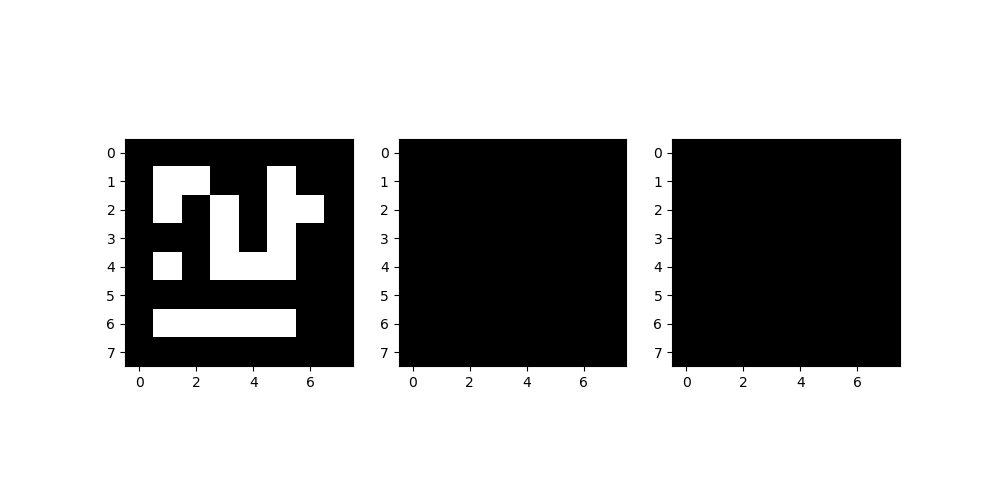

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_hit_miss_1, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_hit_miss_2, cmap='gray')

plt.show()

### Detecção de cantos usando a Transformada Hit-or-Miss

In [12]:
ee_sup_esq_hit = np.array([[0, 0, 0],
                           [0, 1, 1],
                           [0, 1, 0]])
ee_sup_esq_miss =  np.array([[1, 1, 0],
                             [1, 0, 0],
                             [0, 0, 0]])

ee_inf_esq_hit =  np.array([[0, 1, 0],
                            [0, 1, 1],
                            [0, 0, 0]])
ee_inf_esq_miss =  np.array([[0, 0, 0],
                             [1, 0, 0],
                             [1, 1, 0]])

ee_sup_dir_hit =  np.array([[0, 0, 0],
                            [1, 1, 0],
                            [0, 1, 0]])
ee_sup_dir_miss =  np.array([[0, 1, 1],
                             [0, 0, 1],
                             [0, 0, 0]])

ee_inf_dir_hit =  np.array([[0, 1, 0],
                            [1, 1, 0],
                            [0, 0, 0]])
ee_inf_dir_miss =  np.array([[0, 0, 0],
                             [0, 0, 1],
                             [0, 1, 1]])

ee_hit_list = [ee_sup_esq_hit, ee_inf_esq_hit, ee_sup_dir_hit, ee_inf_dir_hit]
ee_miss_list = [ee_sup_esq_miss, ee_inf_esq_miss, ee_sup_dir_miss, ee_inf_dir_miss]

#### implementação da Transformada Hit-or-miss do princípio

In [13]:
img_hit_miss_list = []

img_hit_miss = np.zeros(img.shape)

for ee_hit, ee_miss in zip(ee_hit_list, ee_miss_list):
    
    img_hit_miss_temp = np.logical_and(morphology.binary_erosion(img, ee_hit), morphology.binary_erosion(~img, ee_miss))
   
    img_hit_miss_list.append(img_hit_miss_temp)
    
    img_hit_miss = np.logical_or(img_hit_miss, img_hit_miss_temp)

<IPython.core.display.Javascript object>


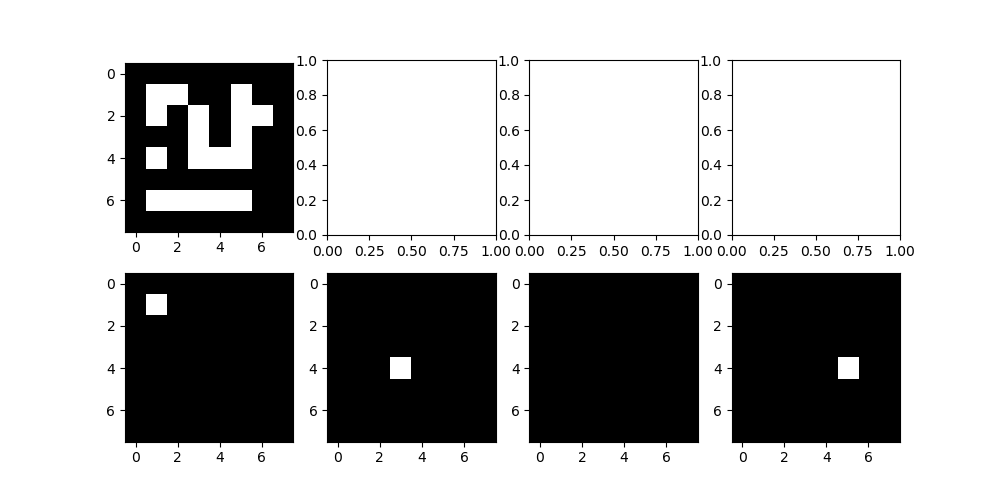

In [14]:
fig, ax  = plt.subplots(2, 4, figsize=(10,5))

img_ = ax[0,0].imshow(img, cmap='gray')

for i, img_hit_miss_temp in enumerate(img_hit_miss_list):

    img_ = ax[1,i].imshow(img_hit_miss_temp, cmap='gray')
    
plt.show()

#### implementação da Transformada Hit-or-miss na biblioteca SciPy

In [15]:
img_hit_miss_list = []

img_hit_miss = np.zeros(img.shape)

for ee_hit, ee_miss in zip(ee_hit_list, ee_miss_list):
    img_hit_miss_temp = ndimage.binary_hit_or_miss(img, ee_hit, ee_miss)
    
    img_hit_miss_list.append(img_hit_miss_temp)
    
    img_hit_miss = np.logical_or(img_hit_miss, img_hit_miss_temp)

#### Plota as imagens

<IPython.core.display.Javascript object>


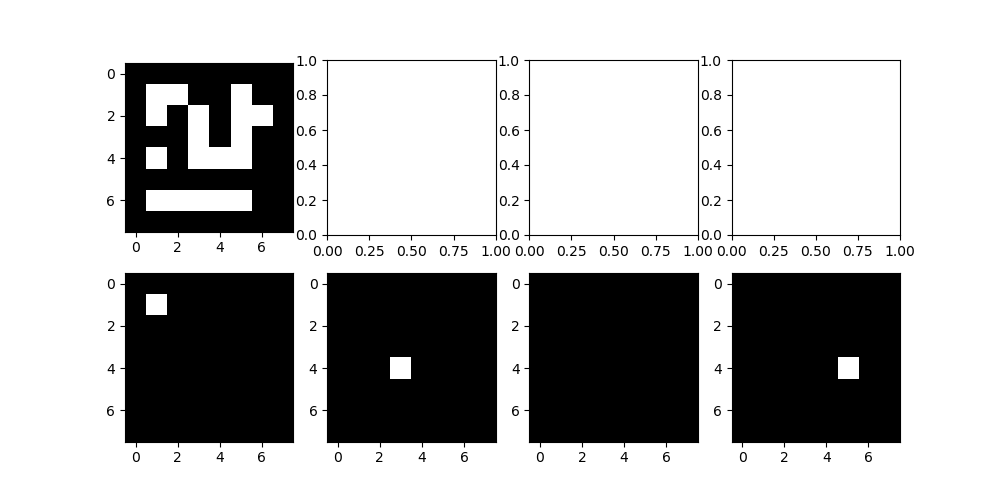

In [16]:
fig, ax  = plt.subplots(2, 4, figsize=(10,5))

img_ = ax[0,0].imshow(img, cmap='gray')

for i, img_hit_miss_temp in enumerate(img_hit_miss_list):

    img_ = ax[1,i].imshow(img_hit_miss_temp, cmap='gray')
    
plt.show()

### Detecção de pontos extremos usando a transformada Hit-or-Miss

In [17]:
ee_up_hit = np.array([[0, 0, 0],
                      [0, 1, 0],
                      [0, 0, 0]])
ee_up_miss =  np.array([[0, 1, 0],
                        [1, 0, 1],
                        [0, 0, 0]])

ee_down_hit =  np.array([[0, 0, 0],
                         [0, 1, 0],
                         [0, 0, 0]])
ee_down_miss =  np.array([[0, 0, 0],
                          [1, 0, 1],
                          [0, 1, 0]])

ee_left_hit =  np.array([[0, 0, 0],
                         [0, 1, 0],
                         [0, 0, 0]])
ee_left_miss =  np.array([[0, 1, 0],
                          [1, 0, 0],
                          [0, 1, 0]])

ee_right_hit =  np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]])
ee_right_miss =  np.array([[0, 1, 0],
                           [0, 0, 1],
                           [0, 1, 0]])

ee_hit_list = [ee_up_hit, ee_down_hit, ee_left_hit, ee_right_hit]
ee_miss_list = [ee_up_miss, ee_down_miss, ee_left_miss, ee_right_miss]

In [18]:
img_hit_miss_list = []

img_hit_miss = np.zeros(img.shape)

for ee_hit, ee_miss in zip(ee_hit_list, ee_miss_list):
    
    img_hit_miss_temp = np.logical_and(morphology.binary_erosion(img, ee_hit), morphology.binary_erosion(~img, ee_miss))
   
    img_hit_miss_list.append(img_hit_miss_temp)
    
    img_hit_miss = np.logical_or(img_hit_miss, img_hit_miss_temp)

#### Plotando as imagens

<IPython.core.display.Javascript object>


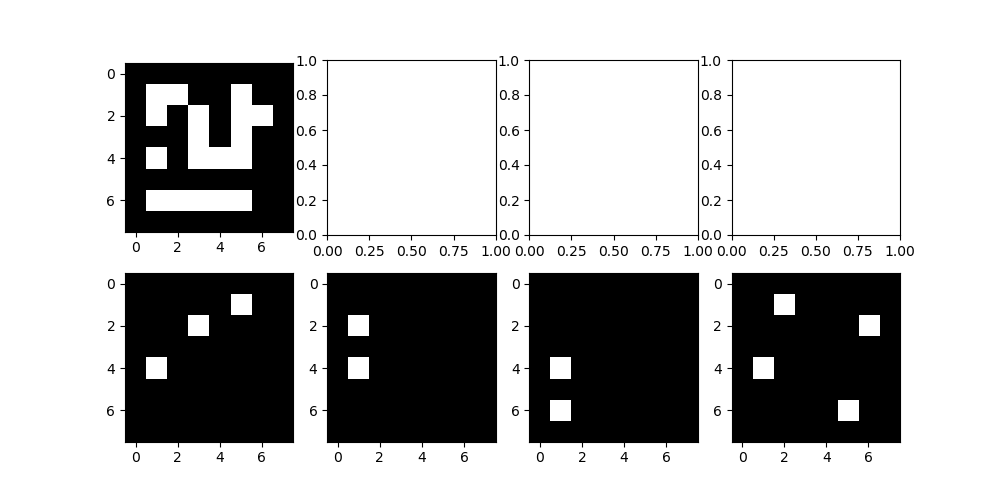

In [19]:
fig, ax  = plt.subplots(2, 4, figsize=(10,5))

img_ = ax[0,0].imshow(img, cmap='gray')

for i, img_hit_miss_temp in enumerate(img_hit_miss_list):

    img_ = ax[1,i].imshow(img_hit_miss_temp, cmap='gray')
    
plt.show()

# Bibliografia

MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.

    Disponível para download no site do autor (Exclusivo para uso pessoal)

    http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

    Disponível na Biblioteca Virtual da Pearson.

J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.

    http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

Prof. Aldo von Wangenheim. Morfologia Matemática

    http://www.inf.ufsc.br/~visao/morfologia.pdf

Prof. James Facon. A Morfologia Matemática e suas Aplicações em Processamento de Imagens - Minicurso – WVC 2011
    
    http://www.ppgia.pucpr.br/~facon/Books/2011WVCMinicurso2Morfo.pdf 

Universidade de Waterloo. Image Repository.

    http://links.uwaterloo.ca/Repository.html
    
The USC-SIPI Image Database.    
    
    http://sipi.usc.edu/database/database.php
    
Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    
    Disponível em: http://scipy-lectures.org/

scikit-image. Documentação.

    https://scikit-image.org/docs/dev/index.html

scikit-image. Documentação. Módulo 'morphology'. 
    
    https://scikit-image.org/docs/dev/api/skimage.morphology.html
    
Morphological Filtering 
    
    https://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology.html
    
OpenCV. Hit-or-Miss.

    https://docs.opencv.org/3.4/db/d06/tutorial_hitOrMiss.html
    
NumPy. Documentação.

    https://numpy.org/doc/stable/